Distribuição de probabilidade 2
===============================



## Variáveis aleatórias contínuas e discretas



Quando medimos a altura de pessoas, geralmente reportamos o valor em metros com no máximo duas casas decimais. Isso ocorre pois nosso instrumento de medida raramente tem uma precisão maior que essa. Neste contexto, podemos tratar a altura como uma variável aleatória discreta e podemos utilizar dos conceitos de distribuição de probabilidades que vimos no notebook anterior (que tratava apenas de variáveis aleatórias discretas).

No entanto, assumir que a altura de pessoas é uma variável discreta é uma simplificação da realidade; sabemos que a altura das pessoas varia de forma contínua. Se tivéssemos instrumentos suficientemente precisos, poderíamos medir a altura com maior precisão e confirmar que a altura é, de fato, uma variável aleatória contínua.

Uma variável aleatória contínua pode assumir infinitos valores dentro de um ou mais intervalos numéricos. Observe que este é um infinito incontável, uma vez que não podemos listar todos os valores possíveis. Muito cuidado aqui: uma variável aleatória que pode assumir apenas valores inteiros é discreta, mesmo que este conjunto seja infinito (isto ocorre pois o conjunto dos inteiros é um conjunto de tamanho infinito, porém contável).



## Distribuição de probabilidades para variáveis contínuas



Observe que agora que estamos no contexto de variáveis aleatórias contínuas, não temos mais como listar todos os valores possíveis que a variável pode assumir. Sendo assim, não é possível construir uma pmf (função massa de probabilidade) para esta variável.

Neste caso, nós podemos construir uma *função densidade de probabilidade* (probability density function em inglês, ou simplesmente pdf). Para $f(x)$ ser considerada uma pdf, temos que ela deve apresentar as seguintes propriedades:

$$
\forall x: f(x) \geq 0
$$

e

$$
\int_{-\infty}^{\infty} f(x) \, \mathrm{d}x = 1.
$$

Sendo $f(x)$ uma pdf, temos que a probabilidade de observar um resultado $X \in [a, b]$ é de

$$
P(a \leq X \leq b) = \int_{a}^{b} f(x) \, \mathrm{d}x.
$$

Estas propriedades apresentadas estão intimamente relacionadas aos axiomas de Kolmogorov, você consegue visualizar isso?

Observe que no caso particular onde $a=b$ temos que

$$
P(a \leq X \leq b) = P(a \leq X \leq a) = P(X = a) = \int_{a}^{a} f(x) \, \mathrm{d}x = 0.
$$

Do resultado acima, temos que não importa se incluímos os extremos na hora de computar a probabilidade, logo:

$$
P(a \leq X \leq b) = P(a \leq X < b) = P(a < X \leq b) = P(a < X < b).
$$



## Distribuição uniforme



Imagine um relógio analógico onde seus ponteiros caminham continuamente por todo o percurso circular. Imagine que trata-se de um relógio movido a pilha e que esta pilha tem uma quantidade finita de energia. Eventualmente esta energia irá acabar e o relógio irá parar. Ao parar, o ponteiro dos segundos terá um certo ângulo $\alpha$ com relação ao eixo $x$ do relógio.

Como você representaria a pdf do ângulo $\alpha$ de parada? É razoável pensar que todo e qualquer ângulo $\alpha \in [0^\circ, 360^\circ]$ deva ter a mesma probabilidade de ocorrer, uma vez que não faz sentido existir um ângulo preferencial neste problema. Logo, temos a seguinte pdf:

$$
f(x)=\begin{cases}
\frac{1}{360} & 0^\circ \leq x \leq 360^\circ\\
0 & \textrm{caso contrário}
\end{cases}
$$

Vamos ver um gráfico desta pdf.



Text(0, 0.5, '$f(x)$')

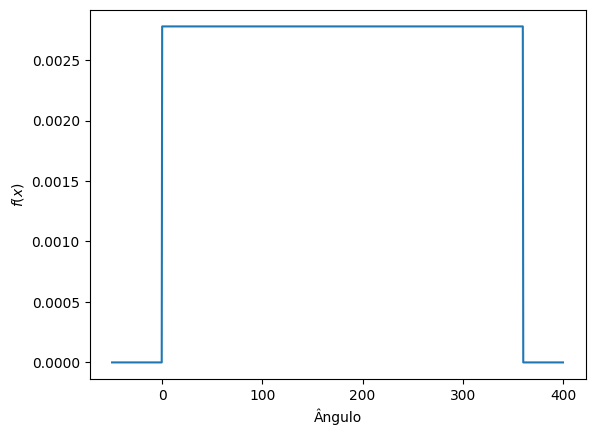

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-50, 400, 1000)

def f(x):
    if 0 <= x <= 360:
        return 1/360
    else:
        return 0

y = []

for x_ in x:
    y.append(f(x_))

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("Ângulo")
eixo.set_ylabel("$f(x)$")

Observe que a integral $\int_{-\infty}^{\infty} f(x) \, \mathrm{d}x$ é de fato igual a 1 neste caso, que é condição necessária para $f(x)$ ser uma pdf.

Qual a probabilidade do ponteiro parar entre os ângulos 90° e 180°?



In [4]:
from scipy.integrate import quad

a = 90
b = 180

prob = quad(f, a, b)[0]  # leia: integral de f de a até b

print(f"A probabilidade do ponteiro parar entre {a} e {b} é de {prob * 100}%")

A probabilidade do ponteiro parar entre 90 e 180 é de 25.0%


A forma geral de uma distribuição uniforme no intervalo $[A,B]$ é

$$
f(x; A, B)=\begin{cases}
\frac{1}{B - A} & A \leq x \leq B\\
0 & \textrm{caso contrário}
\end{cases}
$$



## Função de distribuição acumulada



É possível aplicar o mesmo conceito de função de distribuição acumulada (cdf, visto no notebook anterior) para distribuições contínuas. Sendo $F(x)$ a função de distribuição acumulada, temos

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(x) \, \mathrm{d}x.
$$

Vamos ver um gráfico.



C:\Users\caue23024\AppData\Local\Temp\ipykernel_18164\27097878.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f, -np.inf, x)[0]


Text(0, 0.5, '$F(x)$')

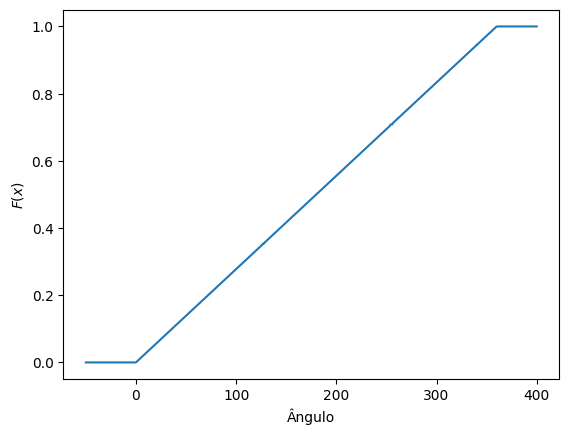

In [8]:
x = np.linspace(-50, 400, 1000)

def f(x):
    if 0 <= x <= 360:
        return 1/360
    else:
        return 0

def F(x):
    return quad(f, -np.inf, x)[0]

y = []

for x_ in x:
    y.append(F(x_))

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("Ângulo")
eixo.set_ylabel("$F(x)$")

Da definição de $F(x)$ (e supondo que $a \leq b$) é fácil de observar que

$$
P(a \leq X \leq b) = F(b) - F(a)
$$

e que

$$
\frac{\mathrm{d}}{\mathrm{d}x} F(x) = f(x)
$$



## Percentil



Dizemos que o valor $x$ está no 95° percentil quando 95% de toda a população tem valor menor que o valor $x$ para a variável aleatória sendo estudada. É o mesmo que dizer que o valor $x$ está no top 5% neste caso.

O próprio valor da $F(x)$ já indica a fração da população que tem valor menor que $x$ (ver definição). Neste contexto, definimos o valor $p$ tal que

$$
p = F(\eta(p)).
$$

O valor $100p$ é o percentil da distribuição acumulada $F(x)$. O valor $\eta(p)$ (a letra grega $\eta$ se chama &ldquo;eta&rdquo;) é o valor da variável $x$ associada ao percentil $100p$.

Vamos ver na prática!



(-0.05000358687148087, 1.050075324301098)

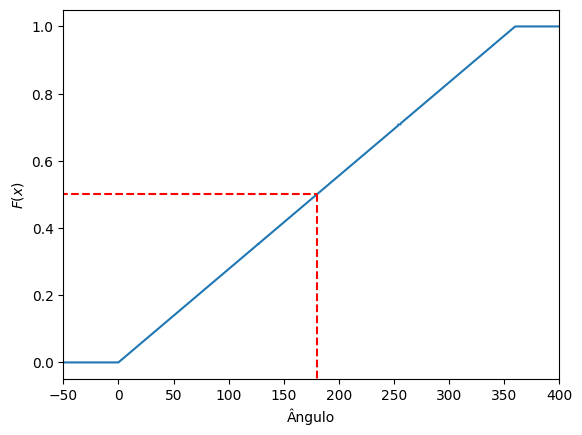

In [12]:
PERCENTIL = 50

eta = x[np.argmin(abs(np.array(y) - PERCENTIL / 100))]

figura, eixo = plt.subplots()

eixo.plot(x, y)

xmin, xmax = eixo.get_xlim()
ymin, ymax = eixo.get_ylim()

eixo.plot([xmin, eta], [PERCENTIL / 100, PERCENTIL / 100], ls="--", c="red")
eixo.plot([eta, eta], [PERCENTIL / 100, ymin], ls="--", c="red")

eixo.set_xlabel("Ângulo")
eixo.set_ylabel("$F(x)$")

eixo.set_xlim(min(x), max(x))
eixo.set_ylim(ymin, ymax)

A mediana de uma distribuição de probabilidades contínua é definida como sendo o valor onde $F(\eta(0.5)) = 0.5$. A mediana separa exatamente 50% da população para cada lado.



## Valor esperado



A expressão do valor esperado para uma pdf é:

$$
E[X] = \int_{-\infty}^{\infty} x \cdot f(x) \, \mathrm{d}x \equiv \mu_X.
$$

Vamos ver um exemplo.



In [5]:
def f(x):
    if 0 <= x <= 360:
        return 1/360
    else:
        return 0

def valor_esperado(f):
    """Computa o valor esperado para uma distribuição contínua."""
    return quad(lambda x: x * f(x), -np.inf, np.inf)[0]

v_esperado = valor_esperado(f)

print(v_esperado)

180.00000003574786


É comum aplicarmos uma função $h$ à variável aleatória $X$. Neste caso, temos a expressão geral do valor esperado:

$$
E[h(X)] = \int_{-\infty}^{\infty} h(x) \cdot f(x) \, \mathrm{d}x \equiv \mu_{h(X)}.
$$

A expressão original que vimos acima era o caso particular quando a função $h$ é a função identidade (isto é, $h(x) = x$).

Vamos ver um exemplo: cálculo de $E[X^2]$ (observe que neste caso, $h(x)=x^2$)



In [6]:
def f(x):
    if 0 <= x <= 360:
        return 1/360
    else:
        return 0

def valor_esperado(f, h=lambda x: x):
    """Computa o valor esperado para uma distribuição contínua."""
    return quad(lambda x: h(x) * f(x), -np.inf, np.inf)[0]

def h(x):
    return x ** 2

v_esperado = valor_esperado(f, h)

print(v_esperado)

43200.00001286936


## Variância



A definição de variância para uma pdf é a mesma que vimos no notebook anterior para uma pmf.

$$
\mathrm{Var}(X) = E[(X-\mu_X)^2]
$$



In [7]:
v_esperado = valor_esperado(f)

def h(x):
    return (x - v_esperado) ** 2

variancia = valor_esperado(f, h)

print(variancia)

10800.000003217336


Podemos usar também a expressão abaixo (são equivalentes).

$$
\mathrm{Var}(X) = E[X^2] - (E[X])^2
$$



In [8]:
v_esperado = valor_esperado(f)

def h(x):
    return x ** 2

v_esperado_2 = valor_esperado(f, h)
variancia = v_esperado_2 - v_esperado**2
print(variancia)

10800.000000000127


Lembrando que a definição do desvio padrão permanece a mesma desde o primeiro notebook: $\sigma(X) = \sqrt{\mathrm{Var}(X)}$.



## A distribuição normal



A distribuição normal é provavelmente a distribuição contínua mais famosa que existe. Também é conhecida como distribuição Gaussiana e, em inglês, vocês também encontrarão pessoas chamando ela de *bell curve* (curva no formato de sino).

A expressão desta distribuição é

$$
f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp \left( -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right),
$$

onde $\mu$ é a média da distribuição e $\sigma$ é o desvio padrão.

Quando uma variável aleatória $X$ segue a distribuição normal, isso é geralmente abreviado como $X \sim N(\mu, \sigma^2)$ ou $X \sim \mathcal{N}(\mu, \sigma^2)$

Antes de seguir, vamos ver um gráfico desta distribuição. No código abaixo, varie o valor da variável `MEDIA` e `DESV_PADRAO` e observe que a variável `MEDIA` altera a localização do pico e a variável `DESV_PADRAO` altera a largura do pico.



Text(0, 0.5, '$f(x)$')

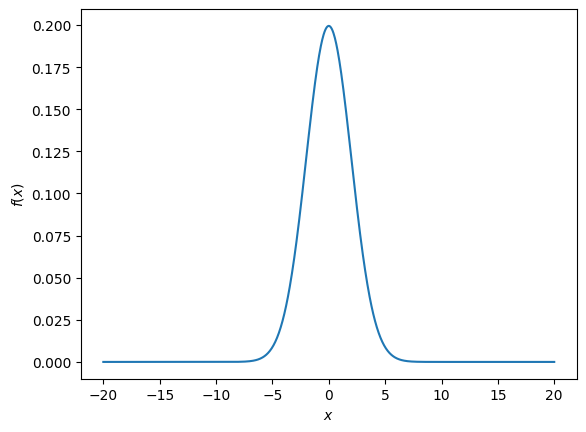

In [22]:
from math import pi

MEDIA = 0
DESV_PADRAO = 2

def dist_normal(x, media, desvpadr):
    """Computa a pdf de uma distribuição normal."""

    preexp = 1 / (desvpadr * (2 * pi) ** (1/2))
    exp = np.exp(-(1 / 2) * ((x - media) / desvpadr) ** 2)

    return preexp * exp


x = np.linspace(-20, 20, 1000)
y = dist_normal(x, MEDIA, DESV_PADRAO)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("$f(x)$")

## A distribuição normal padrão



A distribuição normal padrão ($\varphi$) é simplesmente uma distribuição normal com média 0 e desvio padrão 1. Sua pdf é:

$$
\varphi(x) \equiv f(x;0,1) = \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2} \right)
$$

A <u>normalização padrão</u> que vimos em aprendizado de máquina transforma uma distribuição normal qualquer em uma distribuição normal padrão. Por conta disso, a distribuição normal padrão é considerada uma distribuição de referência. Toda distribuição normal pode ser obtida da distribuição normal padrão.

A cdf da distribuição normal padrão é representada pela letra $\Phi$ e sua expressão é:

$$
\Phi(x) = F(x;0,1) = \frac{1}{2} \left( 1 + \textrm{erf} \left( \frac{x}{\sqrt{2}} \right) \right),
$$

onde $\mathrm{erf}$ é uma função especial conhecida como *função erro*, definida como

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} \, \mathrm{d}t.
$$

A integral da função erro não pode ser representada for funções elementares (ou seja, não existe solução analítica para esta integral).

Vamos ver a pdf da distribuição normal padrão.



Text(0, 0.5, '$\\varphi(x)$')

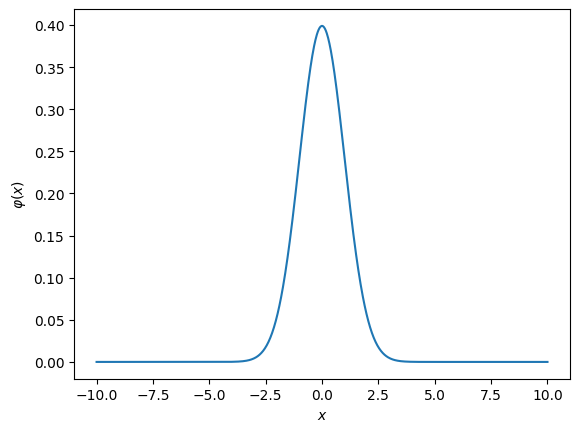

In [24]:
def dist_normal_padrao(x):
    return dist_normal(x, 0, 1)

x = np.linspace(-10, 10, 1000)
y = dist_normal_padrao(x)

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel(r"$\varphi(x)$")

Vamos ver a cdf da distribuição normal padrão.



Text(0, 0.5, '$\\Phi(x)$')

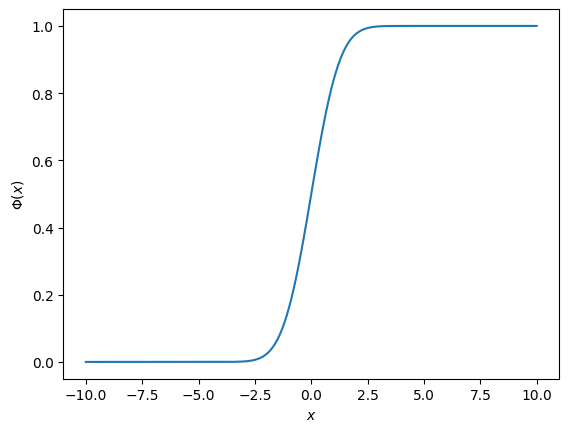

In [28]:
def cdf_dist_normal_padrao(x):
    return quad(dist_normal_padrao, -np.inf, x)[0]

x = np.linspace(-10, 10, 1000)

y = []
for x_ in x:
    y.append(cdf_dist_normal_padrao(x_))

figura, eixo = plt.subplots()

eixo.plot(x, y)

eixo.set_xlabel("$x$")
eixo.set_ylabel("$\Phi(x)$")

## Percentis da distribuição normal



Observe a imagem abaixo.

![img](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg)

Esta imagem nos mostra a área da distribuição normal em relação ao desvio padrão. Observe que 68% da área total da distribuição está entre os valores $\mu - \sigma$ e $\mu + \sigma$. Isto significa que na *maioria* das vezes (68%), observamos eventos que ocorrem entre a média e um desvio padrão para mais ou para menos.

Vamos computar isso para a distribuição normal padrão para checar? Lembrando que nesta distribuição, a média é 0 e o desvio padrão é 1.



In [12]:
area_ate_media_menos_1_dp = cdf_dist_normal_padrao(0 - 1)
area_ate_media_mais_1_dp = cdf_dist_normal_padrao(0 + 1)

area_media_mais_ou_menos_1_dp = (
    area_ate_media_mais_1_dp - area_ate_media_menos_1_dp
)

print(area_media_mais_ou_menos_1_dp)

0.6826894921370864


Considerando dois desvios padrões, temos 95% da área total da distribuição!



In [13]:
area_ate_media_menos_2_dp = cdf_dist_normal_padrao(0 - 2)
area_ate_media_mais_2_dp = cdf_dist_normal_padrao(0 + 2)

area_media_mais_ou_menos_2_dp = (
    area_ate_media_mais_2_dp - area_ate_media_menos_2_dp
)

print(area_media_mais_ou_menos_2_dp)

0.9544997361036449


Com três desvios padrões, temos 99.7% da área total da distribuição (quase tudo).



In [14]:
area_ate_media_menos_3_dp = cdf_dist_normal_padrao(0 - 3)
area_ate_media_mais_3_dp = cdf_dist_normal_padrao(0 + 3)

area_media_mais_ou_menos_3_dp = (
    area_ate_media_mais_3_dp - area_ate_media_menos_3_dp
)

print(area_media_mais_ou_menos_3_dp)

0.9973002039367398


Apesar de não ser impossível, é bastante raro observar valores que estejam mais do que 3 desvios padrões distantes da média (tanto para mais quanto para menos).



## Leitura complementar



Na seção 4.3 da referência [1] é apresentada uma forma de aproximar a distribuição binomial (que é discreta) por uma distribuição normal (que é contínua). Leia esta seção e explore estes conhecimentos em código.



## O Teorema do Limite Central



O Teorema do Limite Central é um dos mais importantes da probabilidade e estatística. Veja este [excelente vídeo](https://www.youtube.com/watch?v=zeJD6dqJ5lo) do canal 3blue1brown sobre este teorema.



## XKCD relevante



![img](https://imgs.xkcd.com/comics/normal_distribution.png)

`Imagem: Normal Distribution (XKCD) disponível em https://xkcd.com/2118`



## Referências



1.  DEVORE, Jay L. Probabilidade E Estatística Para Engenharia E Ciências. Tradução Da 9ª Edição Norte-Americana. Cengage Learning, 2018.

2.  Distribuição normal [https://en.wikipedia.org/wiki/Normal_distribution](https://en.wikipedia.org/wiki/Normal_distribution)

3.  Função erro [https://en.wikipedia.org/wiki/Error_function](https://en.wikipedia.org/wiki/Error_function)

4.  Vídeo sobre o Teorema do Limite Central [https://www.youtube.com/watch?v=zeJD6dqJ5lo](https://www.youtube.com/watch?v=zeJD6dqJ5lo)

